<a href="https://colab.research.google.com/github/joanglaunes/GEF/blob/main/TP1_GEF_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Géométrie et espaces de formes - TP 1


## 1. Noyaux reproduisants et interpolation


### Noyaux reproduisants

Soit $H$ un espace de Hilbert de fonctions $f:{\mathbb R}^d\rightarrow{\mathbb R}$. $H$ est un espace à noyau reproduisant s'il existe une fonction
$K_H:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ telle que $\forall x\in{\mathbb R}^d, K_H(\cdot,x)\in H$, et

$$ \forall f\in H,\quad\forall x\in{\mathbb R}^d,\quad f(x)=\langle{K_H(\cdot,x)},f\rangle_H.$$

$K_H$ est alors défini de façon unique et est appelé noyau reproduisant de $H$. On peut remarquer que l'on a la propriété suivante (propriété reproduisante) :

$$\forall x,y\in{\mathbb R}^d,\quad \langle K_H(\cdot,x),K_H(\cdot,y)\rangle_H=K_H(x,y).$$

Inversement, il est possible, à partir d'une fonction $K:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ de type positif, de construire l'unique espace de Hilbert $H$ de fonctions tel que $K_H=K$.

### Un premier exemple : espace de Sobolev $H^1({\mathbb R})$

L'espace de Sobolev $H^1({\mathbb R})$ est l'espace des fonctions de $L^2({\mathbb R})$ dont la dérivée au sens faible appartient aussi à $L^2({\mathbb R})$. En fait tout élément de $H^1({\mathbb R})$ admet un représentant continu et on peut aussi définir $H^1({\mathbb R})$
de façon classique comme l'espace des fonctions $f:{\mathbb R}\rightarrow{\mathbb R}$ continues, de carré intégrable, dérivables presque partout et telles que $\int_x^yf'(t)dt=f(y)-f(x)$ pour tous réels $x,y$. Sur cet espace on définit habituellement le produit scalaire
$$\langle f,g\rangle_{H^1} = \int_{\mathbb R} f(t)g(t)+f'(t)g'(t)\;dt,$$
mais on peut aussi définir plus généralement pour une échelle $\sigma>0$ fixée,
$$\langle f, g\rangle_{H^1_\sigma} = \int_{\mathbb R} f(t)g(t)+\sigma^2f'(t)g'(t)\;dt.$$
On note $H^1_\sigma$ l'espace $H^1({\mathbb R})$ muni de ce produit scalaire. C'est un espace de Hilbert.

__Question 1__ : Montrer que $H^1_\sigma$ est un espace à noyau reproduisant dont le noyau est la fonction $K_\sigma:{\mathbb R}^2\rightarrow{\mathbb R}$ définie par

$$\forall x,y\in{\mathbb R},\quad K_\sigma(x,y)=\frac1{2\sigma}e^{-\frac{|x-y|}\sigma}.$$

__Question 2__ : Vérifier numériquement la propriété du noyau : choisir par exemple $\sigma=2$, une fonction $f\in H^1_\sigma$ quelconque (par exemple $f(x)=e^{-x^2}$), un réel $x\in{\mathbb R}$ quelconque, puis calculer une valeur approchée de $\langle f, {K_\sigma(\cdot,x)}\rangle_{H^1_\sigma}$ par sommes et différences finies et comparer avec $f(x)$. Vérifier également numériquement la propriété reproduisante.

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
from mpl_toolkits.mplot3d import Axes3D

In [28]:
# fonction pour définir le noyau
def KH1(x,y,sigma=1):
    # ... à compléter
    return np.exp(-np.abs(x-y)/sigma)/(2*sigma)

# fonction pour définir le produit scalaire
def H1ScalProd(f,g,sigma=1):
    # ... à compléter
    # f et g sont deux fonctions python
    # doit renvoyer <f,g>_H1 calculé par sommes et différences finies
    # on effectue l'intégration sur un intervalle fixé supposé suffisamment grand
    # pour que les fonctions soient presque nulles en dehors de l'intervalle.
    # ex : [-10,10] suffit pour les fonctions considérées ici.
    a,b = -10,10
    N = 10000
    t = np.linspace(a,b,N)
    dt = (b-a)/(N-1)
    ft = f(t)
    gt = g(t)
    I1 = np.sum(ft*gt)*dt
    fpt = np.diff(ft)/dt
    gpt = np.diff(gt)/dt
    I2 = np.sum(fpt*gpt)*dt
    return I1 + sigma**2 *I2

# définition des paramètres et fonctions à tester
# ... à compléter
y = 1.2
f = lambda x : np.exp(-x**2)
g = lambda x : KH1(x,y)

# test : valeur du produit scalaire <f,KH1(.,x)>_H1 et comparaison avec f(x)
# ... à compléter
print("vérification définition du noyau")
print(H1ScalProd(f,g))
print(f(y))

# vérification de la propriété reproduisante : calcul de <KH1(.,y),KH1(.,x)>_H1 et comparaison avec KH1(x,y)
# ... à compléter
print("vérification prop reproduisante")
y1, y2 = 1.2, 0.5
f = lambda x : KH1(x,y1)
g = lambda x : KH1(x,y2)
print(H1ScalProd(f,g))
print(KH1(y1,y2))

vérification définition du noyau
0.23692813293999213
0.23692775868212176
vérification prop reproduisante
0.24829274418176134
0.24829265189570476


### Problème d'interpolation scalaire

Le noyau $K_H$ permet de résoudre le problème d'interpolation suivant:

$$\left\{\begin{array}{l}
\text{Minimiser }\left\|f\right\|_H\text{ pour }f\in H,
\\ \text{sous les contraintes }f(y_i)=c_i,\quad 1\leq i\leq n
\end{array}\right.
$$

où $y_i\in{\mathbb R}^d, c_i\in$ sont fixés. La solution de ce problème est donnée par
$$f^*(x)=\sum_{j=1}^nK_H(x,y_j)a_j,$$
où les $a_j\in{\mathbb R}$ sont solutions du système linéaire

$$\forall i,\quad 1\leq i\leq n,\quad\sum_{j=1}^nK_H(y_i,y_j)a_j=c_i.$$

Ces équations peuvent s'écrire sous forme condensée: notons ${\bf y}=(y_1,\ldots,y_n)\in{\mathbb R}^{dn}$, $\boldsymbol{a}=(a_1,\ldots,a_n)\in{\mathbb R}^{n}$, ${\bf c}=(c_1,\ldots,c_n)\in{\mathbb R}^{n}$, et $K_H({\bf y},{\bf y})\in M_{n}({\mathbb R})$ la matrice des $K_H(y_i,y_j)$ pour $1\leq i,j\leq n$. Le système linéaire à résoudre s'écrit alors

$$K_H({\bf y},{\bf y}){\bf a}={\bf c}.$$

De même, l'évaluation de la solution $f^*$ en des points $x_i\in{\mathbb R}^d, 1\leq i\leq p$ s'écrit

$${\bf f}^*({\bf x})=K_H({\bf x},{\bf y}){\bf a},$$

où ${\bf x}=(x_1,\ldots,x_p)\in{\mathbb R}^{dp}$, ${\bf f}^*({\bf x})=(f^*(x_1),\ldots,f^*(x_p))$, et $K_H({\bf x},{\bf y})\in M_{p,n}({\mathbb R})$ est la matrice des $K_H(x_i,y_j)$ pour $1\leq i\leq p$, $1\leq j\leq n$.

<br>
<br>

__Question 3__ : Ecrire une fonction
`KernelMatrix(x,y,h)` qui construit
la matrice $K_H({\bf x},{\bf y})$ pour des points ${\bf x}\in{\mathbb R}^{pd}$, ${\bf y}\in{\mathbb R}^{nd}$ quelconques (supposés entrés sous forme de tableaux $p\times d$ et $n\times d$), et un noyau de la forme $K_H(x,y)=h\left(\|x-y\|\right)$, où $h$ est une fonction scalaire.

In [29]:
def KernelMatrix(x,y,h):
    # ... à compléter
    # x : taille (p,d)
    # y : taille (n,d)
    # renvoie M = K(x,y) de taille (p,n) telle que M_ij = h(||x_i-y_j||)
    x = x[:,None,:] # (p,1,d)
    y = y[None,:,:] # (1,n,d)
    Dxy = np.linalg.norm(x-y, axis=2) # taille (p,n), matrice des ||x_i-y_j||
    return h(Dxy)

<br>
Voici un exemple de son utilisation :

In [30]:
import numpy as np
x = np.random.rand(5,2)        # 5 points tirés aléatoirement dans [0,1]^2
y = np.random.rand(3,2)        # 3 points tirés aléatoirement dans [0,1]^2
sigma = 1.5                     # échelle du noyau
def gauss(sigma):
    def f(u):
        return np.exp(-u**2/sigma**2)
    return f
Kxy = KernelMatrix(x,y,gauss(sigma))
print(Kxy)

[[0.78337314 0.93829579 0.7476698 ]
 [0.99723192 0.66029079 0.89845267]
 [0.94467081 0.80932836 0.84751718]
 [0.95208394 0.79369602 0.99435654]
 [0.71845362 0.99109039 0.81568748]]


<br>
<br>

__Question 4__ : Ecrire une fonction
`Interp(x,y,c,h)`
qui résout le problème d'interpolation $f(y_i)=c_i$, $1\leq i\leq n$ et renvoie l'évaluation de la solution aux points $x_i$, $1\leq i\leq p$`

In [31]:
def Interp(x,y,c,h):
    # ... à compléter
    Kyy = KernelMatrix(y,y,h)
    a = np.linalg.solve(Kyy,c)
    Kxy = KernelMatrix(x,y,h)
    return Kxy @ a

<br>

__Question 5__ : Tester la fonction `Interp` tout d'abord avec $d=1$:

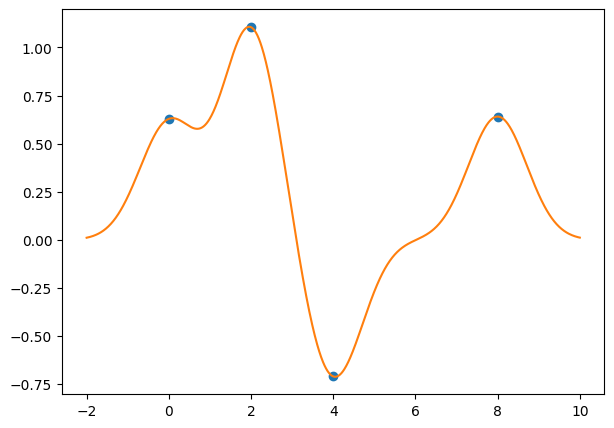

In [32]:
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation
sigma = 1
fx = Interp(x,y,c,gauss(sigma))         # calcul de l'interpolation

plt.plot(y,c,'o')                       # affichage
plt.plot(x,fx);

<br>
<br>

Tester ensuite le même problème en changeant l'échelle du noyau : on prendra ainsi $h(u)=e^{-u^2/\sigma^2}$ pour $\sigma\in\{0.2,2,4,10\}$. Afficher sur le même graphique les différentes solutions. Tester également l'interpolation avec des noyaux de Cauchy : $h(u)=\frac1{1+u^2/\sigma^2}$.

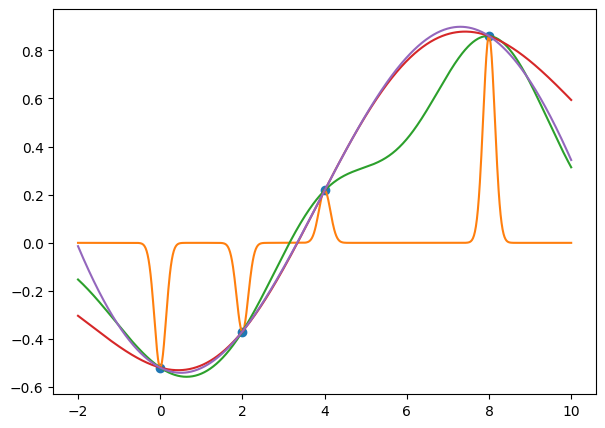

In [33]:
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation

plt.plot(y,c,'o')
for sigma in (0.2,2,4,10):
    fx = Interp(x,y,c,gauss(sigma))         # calcul de l'interpolation
    plt.plot(x,fx);

<br>
<br>

__Question 6__ : Effectuer l'interpolation avec un noyau $K_\sigma$ de la première partie, et vérifier numériquement
que la norme dans $H^1_\sigma$ de la solution est toujours inférieure à la norme d'autres fonctions de $H^1_\sigma$ passant par les points (par exemple les solutions du problème d'interpolation avec d'autres noyaux).

<br>
<br>

__Question 7 (résolue)__ : Tester à présent l'interpolation dans le cas $d=2$: choisir par exemple $10$ points $y_i$ dans $[0,1]^2$ et des réels $c_i$ tirés aléatoirement, puis évaluer sur une grille uniforme de $100*100$ points que l'on construira avec la commande suivante : `X1, X2 = np.meshgrid(t,t)`

In [34]:
def InterpGrid(X1,X2,y,c,h) :
    # ... à compléter
    # doit renvoyer l'évaluation de l'interpolant à noyau sur les points de la grille X1,X2
    x = np.array([X1.flatten(),X2.flatten()]).T
    z = Interp(x,y,c,h)
    Z = z.reshape(X1.shape)
    return Z

n = 10
d = 2
sigma = .25
y = np.random.rand(n,d)    # 10 points tirés aléatoirement dans [0,1]^2
c = np.random.randn(n,1)   # 10 valeurs aléatoires
t = np.linspace(0,1,50)
X1, X2 = np.meshgrid(t,t)  # grille uniforme de 50*50 points
Z = InterpGrid(X1,X2,y,c,gauss(sigma))

<br>

Si les valeurs interpolées sont dans le tableau `fX` de taille $100*100$, on affichera ensuite la solution avec

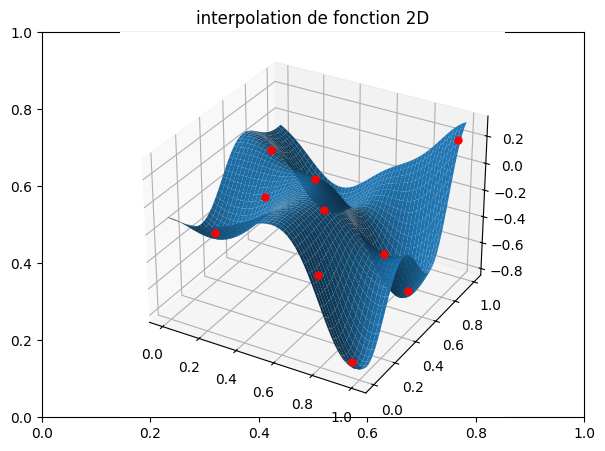

In [35]:
fig = plt.figure()
plt.title("interpolation de fonction 2D")
ax = plt.axes(projection='3d')
ax.plot_surface(X1,X2,Z, zorder=1)
ax.plot(y[:,0],y[:,1],c[:,0],'r.',markersize=10, zorder=3);

<br>
<br>

### Interpolation relaxée

Dans certains cas, les contraintes d'interpolation peuvent s'avérer trop fortes pour la norme de Hilbert utilisée (typiquement lorsque le paramètre d'échelle $\sigma$ est grand par rapport aux positions des points d'interpolation). Numériquement ceci se traduit par une matrice d'interpolation très mal conditionnée. D'autre part les données d'observation peuvent être bruitées, auquel cas une fonction passant exactement par les contraintes n'est plus désirable. Une solution consiste alors à écrire un problème d'interpolation relaxé (_smoothing spline interpolation_) :

$$\text{Minimiser }\quad\lambda\left\|f\right\|_H^2+\sum_{i=1}^n(f(y_i)-c_i)^2,$$
où $\lambda>0$ est un paramètre à fixer.

<br>

__Question 8__ : Montrer que la solution de l'interpolation inexacte s'obtient en rajoutant $\lambda$ aux coefficients diagonaux de la matrice du système linéaire.

<br>

Modifier les fonctions précédentes pour prendre en compte ce nouveau modèle, et le tester sur les exemples précédents et sur l'exemple suivant :
```
y = np.linspace(0,1,30)[:,None]
c = np.cos(6*y) + .05*np.random.randn(30,1)
```
avec $h(u)=e^{-u^2/\sigma^2}$ et les jeux de paramètres suivants : $\sigma\in\{0.1,0.25\}, \lambda\in\{0,0.1\}$.

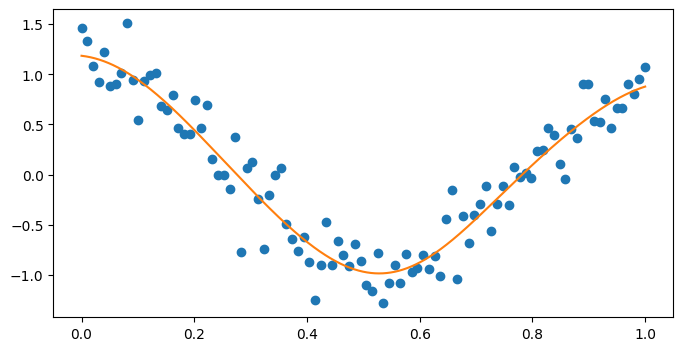

In [36]:
# redéfinition de Interp pour inclure le paramètre lambda
def Interp(x,y,c,h,l=0):
    # ... à compléter
    n = y.shape[0]
    Kyy = KernelMatrix(y,y,h)
    a = np.linalg.solve(Kyy + l*np.eye(n),c)
    Kxy = KernelMatrix(x,y,h)
    return Kxy @ a

# tests pour différentes valeurs de sigma et de lambda
n = 100
y = np.linspace(0,1,n)[:,None]
c = np.cos(6*y) + .25*np.random.randn(n,1)
# ... à compléter
x = np.linspace(0,1,1000)[:,None]

sigma = .25
l = 0.1
plt.figure(figsize=(8,4))
plt.plot(y,c,'o')
fx = Interp(x,y,c,gauss(sigma),l)
plt.plot(x,fx);

<br>
<br>

### Problème d'interpolation vectorielle

On suppose à présent que $V$ est un espace de Hilbert de fonctions à valeurs vectorielles $v:{\mathbb R}^d\rightarrow{\mathbb R}^m$.
S'il existe, le noyau reproduisant $K_V$ de l'espace $V$ est alors une application ${\mathbb R}^d\times{\mathbb R}^d\rightarrow M_m({\mathbb R})$, définie par la relation:

$$ \forall v\in V,\forall x\in{\mathbb R}^d,\forall \alpha\in{\mathbb R}^m,\quad\langle{v(x)},{\alpha}\rangle=\langle{K_V(\cdot,x)\alpha},v\rangle_V.$$

La propriété reproduisante s'écrit alors

$$ \forall x,y\in{\mathbb R}^d,\forall \alpha,\beta\in{\mathbb R}^m,\quad\left\langle {K_V(\cdot,x)\alpha},{K_V(\cdot,y)\beta}\right\rangle_V=\langle{K_V(x,y)\beta},{\alpha}\rangle.$$

On considère le problème exact d'interpolation vectorielle suivant:

$$\text{Minimiser }\left\| v\right\|_V\text{ pour $v\in V$, sous les contraintes }v(y_i)=\gamma_i,$$

où $y_i\in{\mathbb R}^d, \gamma_i\in{\mathbb R}^m$ sont fixés, $1\leq i\leq n$. On considère aussi le problème relaxé associé :

$$\text{Minimiser }\lambda\|v\|_V^2+\sum_{i=1}^n\|v(y_i)-\gamma_i\|^2,$$

__Question 9__ : Montrer que pour un noyau de la forme $K_V(x,y)=h(\|x-y\|)I_m$, les problèmes d'interpolation vectoriels exacts et relaxés sont équivalents à $m$ problèmes d'interpolation scalaires
avec le noyau scalaire $K_H(x,y)=h(\|x-y\|)$ (on supposera que ce noyau $K_H$ est bien le noyau reproduisant d'un espace de Hilbert $H$ de fonctions scalaires).

<br>

Si besoin, modifier la fonction `Interp` pour qu'elle puisse aussi résoudre les problèmes d'interpolation vectorielle.

<br>

__Question 10 (résolue)__ : Tester la fonction `Interp` avec $d=m=2$: générer des points $y_i$ dans $[0,1]^2$ (commencer avec $n=3$), des vecteurs $\gamma_i$ avec la commande `gamma = 0.05*np.random.randn(n,d)` puis évaluer sur une grille uniforme de taille 20*20. Afficher le champ de vecteurs obtenu avec la fonction `quiver` de Matplotlib.

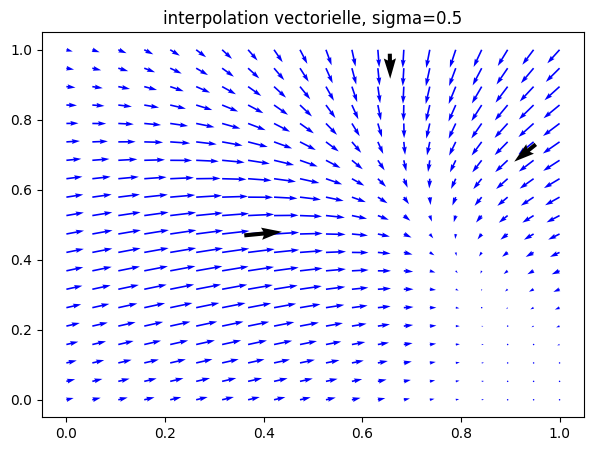

In [39]:
def InterpGrid2D(X1,X2,y,c,h,l=0) :
    # ... à compléter
    # modification de InterpGrid devant renvoyer un interpolant vectoriel et non scalaire
    p,q = X1.shape
    x = np.concatenate((np.reshape(X1,(p*q,1)),np.reshape(X2,(p*q,1))),axis=1)
    vx = Interp(x,y,c,h,l)
    V1 = np.reshape(vx[:,0],(p,q))
    V2 = np.reshape(vx[:,1],(p,q))
    return V1, V2

n = 3
d = 2
m = 2
sigma = .5
y = np.random.rand(n,d)
gamma = 0.05*np.random.randn(n,m)
t = np.linspace(0,1,20)
X1, X2 = np.meshgrid(t,t)
V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma))
plt.title("interpolation vectorielle, sigma="+str(sigma))
plt.quiver(X1,X2,V1,V2,color='b')
plt.quiver(y[:,0],y[:,1],gamma[:,0],gamma[:,1]);


<br>
<br>

## Appariement de points labellisés

### Appariement linéaire

Le problème d'interpolation vectorielle précédent, pour $d=m$, peut être vu comme un problème d'appariement de points. Pour la version "exacte", ceci s'écrit :
$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

On se ramène simplement au problème précédent en posant $\gamma_i=z_i-y_i$.

<br>

__Question 11__ : On se place dans le plan ($d=m=2$). Reprendre l'exemple de la question précédente, en affichant cette fois dans un même graphique les points $y_i$ et $z_i$ et visualiser la solution $\phi$ en calculant et en affichant le déplacement d'une grille de points.

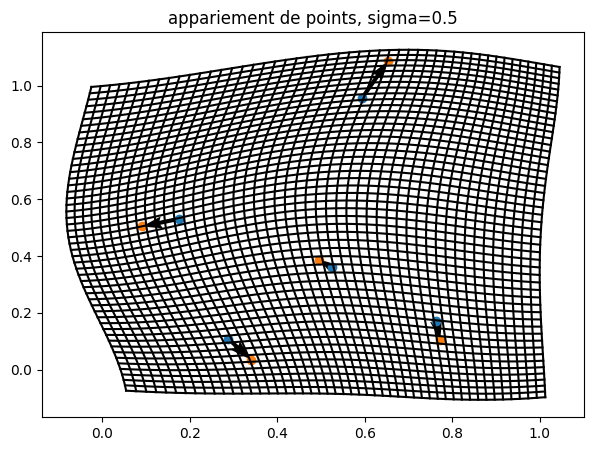

In [40]:
n = 5
d = 2
m = 2
sigma = .5
y = np.random.rand(n,d)
z = y + 0.05*np.random.randn(n,m)
gamma = z-y
t = np.linspace(0,1,50)
X1, X2 = np.meshgrid(t,t)
V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma))
phiX1 = X1+V1
phiX2 = X2+V2
plt.title("appariement de points, sigma="+str(sigma))
plt.plot(y[:,0],y[:,1],'o')
plt.plot(z[:,0],z[:,1],'o')
plt.quiver(y[:,0],y[:,1],z[:,0]-y[:,0],z[:,1]-y[:,1], angles='xy', scale_units='xy', scale=1)
plt.plot(phiX1,phiX2,'k')
plt.plot(phiX1.T,phiX2.T,'k');

<br>
<br>

## Ajout des déplacements affines et modèle Thin Plate Splines

Il est possible d'ajouter au modèle les déplacements affines. Le problème d'appariement exact devient alors:

$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)+Bx+c
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

où $B$ est une matrice carrée de taille $d$ et $c$ un vecteur. On peut montrer que le champ de vecteur optimal s'écrit toujours comme une combinaison linéaire des noyaux $K_V(\cdot,y_i)$.

<br>

__Question 12__ : Trouver le système linéaire à résoudre pour obtenir les coefficients des vecteurs $\alpha_i$, $c$, et de la matrice $B$ (_indications : considérer les conditions de Karush-Kuhn-Tucker à l'optimum pour obtenir les équations manquantes_), puis implémenter cet appariement. Pour une configuration donnée, comparer les déformations obtenues avec ou sans ajout des transformations afines.

<br>

__Question 13__ : Tester à présent ce nouveau modèle avec le noyau $h(r)=r^2\log(r)$. Ce noyau n'est pas de type positif mais semi-positif, et n'est utilisable qu'en incluant les transformations affines. C'est le modèle de spline "plaque mince" (TPS: Thin Plate Splines).

On va tester à présent les méthodes précédentes sur les données du fichier `fish.pckl`. Pour profiter éventuellement de l'accélération GPU et de la différentiation automatique, on utilise de plus à présent la librairie PyTorch pour les calculs à la place de NumPy.

cpu


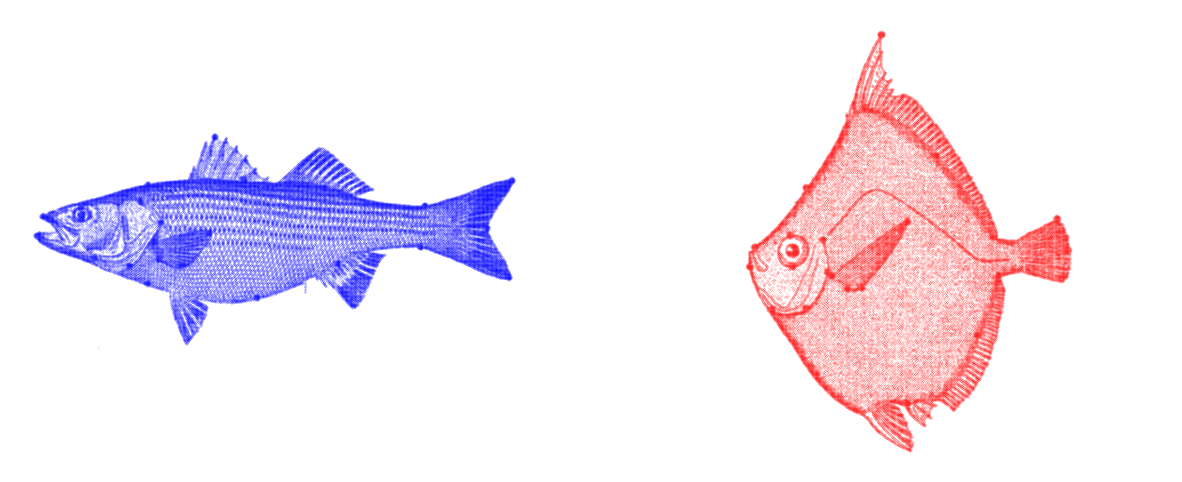

In [41]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

from TP1_utils import PlotPoints, show_anim_transport, load

# Chargement et affichage des donnees "poissons"
pts1,pts2,lmk1,lmk2 = load('fish.pckl')

pts1 = pts1.to(device)
pts2 = pts2.to(device)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
PlotPoints(pts1, clr='b', withgrid=False)
plt.subplot(1,2,2)
PlotPoints(pts2, clr='r', withgrid=False)

<br>

__Question 14__ : Tester l'appariement de points avec le noyau de votre choix pour recaler les points `lmk1` sur les points `lmk2`. Ceci nécessitera de transormer certaines fonctions précédentes pour qu'elles opèrent sur des `torch.tensor`. Afficher la déformation du nuage de points `pts1` via la déformation obtenue.

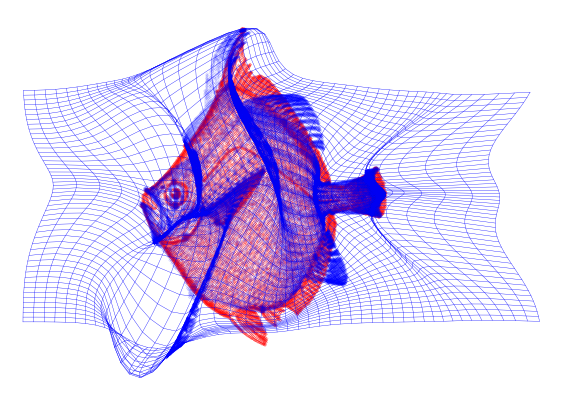

In [42]:
y = lmk1
z = lmk2
x = pts1

gauss = lambda sigma : lambda u : torch.exp(-u**2/sigma**2)

sigma = .25
h = gauss(sigma)

def KernelMatrix(x,y,h):
    # x : taille (p,d)
    # y : taille (n,d)
    # renvoie M = K(x,y) de taille (p,n) telle que M_ij = h(||x_i-y_j||)
    x = x[:,None,:] # (p,1,d)
    y = y[None,:,:] # (1,n,d)
    Dxy = torch.linalg.norm(x-y, axis=2) # taille (p,n), matrice des ||x_i-y_j||
    return h(Dxy)

def Interp(x,y,c,h,l=0):
    n = y.shape[0]
    Kyy = KernelMatrix(y,y,h)
    a = torch.linalg.solve(Kyy + l*torch.eye(n),c)
    Kxy = KernelMatrix(x,y,h)
    return Kxy @ a

phi = lambda x : x + Interp(x,y,z-y,h)
PlotPoints(pts2, clr='r', withgrid=False)
PlotPoints(pts1, phi=phi, clr='b', withgrid=True)

<br>
La donnée de points de référence dans les deux formes source et cible n'est pas souvent possible. Pour définir automatiquement des correspondances, une possibilité est d'utiliser le transport optimal.

__Question 15__ : Utiliser la librairie [POT](https://pythonot.github.io) (Python Optimal Transport) pour définir un plan de transport entre des sous-échantillonages aléatoires des points `pts1` et `pts2` (avec $N=5000$ points), puis afficher le résultat. On pourra s'aider de l'exemple présenté sur [cette page](https://pythonot.github.io/auto_examples/plot_OT_2D_samples.html#sphx-glr-auto-examples-plot-ot-2d-samples-py)

In [ ]:
N = 5000
pts1 = pts1[np.random.choice(pts1.shape[0],N,replace=False)]
pts2 = pts2[np.random.choice(pts2.shape[0],N,replace=False)]

## à compléter
# définition d'un plan de transport T
# (matrice (N,N))

plt.figure(figsize=(10,5))
show_anim_transport(pts1,pts2,T)

__Question 16__ : Grâce aux correspondances obtenues, calculer une déformation optimale avec les méthodes d'interpolation vues précédement (éventuellement avec paramètre de régularisation), et afficher la déformation d'une grille pour la visualiser.